In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('price.csv')

In [5]:
df

,date,bpi
0,2017-01-01,997.6888
1,2017-01-02,1018.0500
2,2017-01-03,1030.8175
3,2017-01-04,1129.8700
4,2017-01-05,1005.8150
...,...,...
1274,2020-06-28,8991.5000
1275,2020-06-29,9096.1500
1276,2020-06-30,9144.3850
1277,2020-07-01,9153.9500


In [6]:
df = df.set_index(pd.to_datetime(df['date']), drop=True)

In [8]:
df = df[["bpi"]]

In [9]:
df

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
...,...
2020-06-28,8991.5000
2020-06-29,9096.1500
2020-06-30,9144.3850


<AxesSubplot:xlabel='date'>

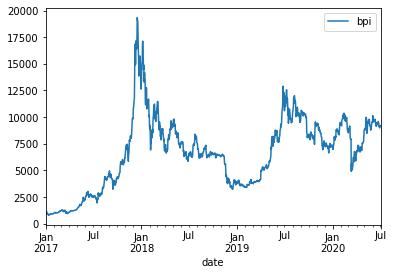

In [10]:
df.plot()

# Resample

D	Calendar day	

B	Business day

W	Weekly		

M	Month

Q	Quarter

A	Year end

H	Hours

T	Minutes		

S	Seconds	

In [11]:
df.resample("Q").mean()

,bpi
date,
2017-03-31,1034.169242
2017-06-30,1919.658520
2017-09-30,3506.611449
2017-12-31,9413.347972
2018-03-31,10468.423818
2018-06-30,7747.165877
2018-09-30,6798.307918
2018-12-31,5169.904503
2019-03-31,3781.639959


In [14]:
df.rolling(window=120).mean()

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,NaN
2017-01-04,NaN
2017-01-05,NaN
...,...
2020-06-28,8188.264600
2020-06-29,8192.897044
2020-06-30,8194.714822


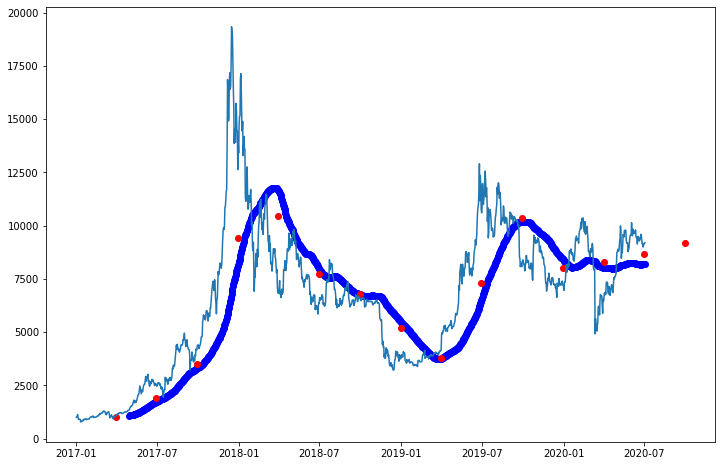

In [23]:
plt.figure(figsize=(12,8))
plt.plot(df["bpi"])
plt.scatter(df.index,df["bpi"].rolling(window=120).mean(),c= "blue")
plt.scatter(df.resample("Q").mean().index,df.resample("Q").mean(),c = "red")

## DIFF
- taking difference

<AxesSubplot:xlabel='date'>

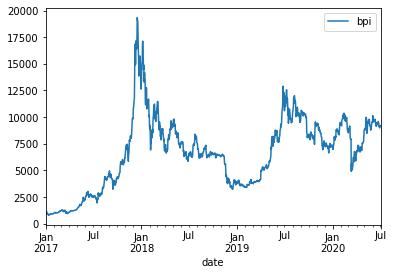

In [24]:
df.plot()

In [27]:
df[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [28]:
df.diff()[:5]

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550


In [29]:
df.diff(2)[:5]

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,33.1287
2017-01-04,111.8200
2017-01-05,-25.0025


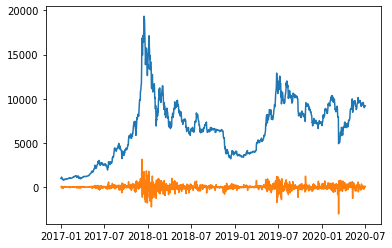

In [32]:
plt.plot(df)
plt.plot(df.diff())


In [33]:
from statsmodels.tsa.stattools import adfuller,kpss 

c:\Users\Z004ET6Z\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [36]:
p = adfuller(df["bpi"].diff()[1:])[1]
print(f"p value is {p}")
if p<0.05:
    print("Null hypothesies rejected")
    print("Data is stationary")

else:
    print("Null hypothesies accepted")
    print("Data is not stationary")

p value is 5.336131919699075e-10
Null hypothesies rejected
Data is stationary


## sHIFT 

- Shifts the index and data value

In [37]:
df[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [38]:
df[:5].shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,997.6888
2017-01-03,1018.0500
2017-01-04,1030.8175
2017-01-05,1129.8700


In [39]:
df[:5].shift(2)

,bpi
date,
2017-01-01,NaN
2017-01-02,NaN
2017-01-03,997.6888
2017-01-04,1018.0500
2017-01-05,1030.8175


In [40]:
from sklearn.linear_model import LinearRegression




In [50]:
np.array(df["bpi"].shift()[3:])

array([1030.8175, 1129.87  , 1005.815 , ..., 9096.15  , 9144.385 ,
       9153.95  ])

In [55]:
df_lr = pd.DataFrame({"y":df["bpi"].values[3:],"y_t-1":np.array(df["bpi"].shift()[3:]),"y_t-2":np.array(df["bpi"].shift(2)[3:]),"y_t-3":np.array(df["bpi"].shift(3)[3:])})

In [56]:
df_lr

,y,y_t-1,y_t-2,y_t-3
0,1129.8700,1030.8175,1018.0500,997.6888
1,1005.8150,1129.8700,1030.8175,1018.0500
2,895.6700,1005.8150,1129.8700,1030.8175
3,905.1700,895.6700,1005.8150,1129.8700
4,913.5238,905.1700,895.6700,1005.8150
...,...,...,...,...
1271,8991.5000,9164.3150,9127.5500,9274.1267
1272,9096.1500,8991.5000,9164.3150,9127.5500
1273,9144.3850,9096.1500,8991.5000,9164.3150
1274,9153.9500,9144.3850,9096.1500,8991.5000


In [58]:
# Sample input data
X = df_lr[["y_t-1","y_t-2","y_t-3"]]
y = df_lr[['y']]



In [59]:
X

,y_t-1,y_t-2,y_t-3
0,1030.8175,1018.0500,997.6888
1,1129.8700,1030.8175,1018.0500
2,1005.8150,1129.8700,1030.8175
3,895.6700,1005.8150,1129.8700
4,905.1700,895.6700,1005.8150
...,...,...,...
1271,9164.3150,9127.5500,9274.1267
1272,8991.5000,9164.3150,9127.5500
1273,9096.1500,8991.5000,9164.3150
1274,9144.3850,9096.1500,8991.5000


In [60]:
y

,y
0,1129.8700
1,1005.8150
2,895.6700
3,905.1700
4,913.5238
...,...
1271,8991.5000
1272,9096.1500
1273,9144.3850
1274,9153.9500


In [61]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)



LinearRegression()

In [62]:
df_lr

,y,y_t-1,y_t-2,y_t-3
0,1129.8700,1030.8175,1018.0500,997.6888
1,1005.8150,1129.8700,1030.8175,1018.0500
2,895.6700,1005.8150,1129.8700,1030.8175
3,905.1700,895.6700,1005.8150,1129.8700
4,913.5238,905.1700,895.6700,1005.8150
...,...,...,...,...
1271,8991.5000,9164.3150,9127.5500,9274.1267
1272,9096.1500,8991.5000,9164.3150,9127.5500
1273,9144.3850,9096.1500,8991.5000,9164.3150
1274,9153.9500,9144.3850,9096.1500,8991.5000


In [65]:
model.predict(np.array([[9144.3850,9096.1500,8991.5000]]))

array([[9134.52407796]])

In [68]:
df_lr["y_pred"] = model.predict(X)

In [69]:
df_lr

,y,y_t-1,y_t-2,y_t-3,y_pred
0,1129.8700,1030.8175,1018.0500,997.6888,1074.623076
1,1005.8150,1129.8700,1030.8175,1018.0500,1173.320088
2,895.6700,1005.8150,1129.8700,1030.8175,1049.600219
3,905.1700,895.6700,1005.8150,1129.8700,939.248420
4,913.5238,905.1700,895.6700,1005.8150,949.218503
...,...,...,...,...,...
1271,8991.5000,9164.3150,9127.5500,9274.1267,9153.152966
1272,9096.1500,8991.5000,9164.3150,9127.5500,8981.485797
1273,9144.3850,9096.1500,8991.5000,9164.3150,9085.593348
1274,9153.9500,9144.3850,9096.1500,8991.5000,9134.524078


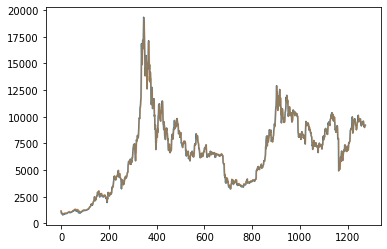

In [74]:
plt.plot(df_lr["y"],label = "Actual")
plt.plot(df_lr["y_pred"],label = "Predicted",alpha = 0.5)

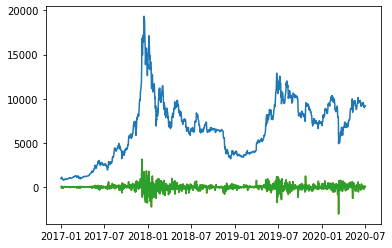

In [75]:
plt.plot(df["bpi"])
plt.plot(df-df.shift())
plt.plot(df.diff())

In [76]:
df-df.shift()

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550
...,...
2020-06-28,-172.8150
2020-06-29,104.6500
2020-06-30,48.2350


In [77]:
df.diff()

,bpi
date,
2017-01-01,NaN
2017-01-02,20.3612
2017-01-03,12.7675
2017-01-04,99.0525
2017-01-05,-124.0550
...,...
2020-06-28,-172.8150
2020-06-29,104.6500
2020-06-30,48.2350


# CUMSUM

- cummulative sum


In [78]:
df[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [79]:
df[:5].cumsum()

,bpi
date,
2017-01-01,997.6888
2017-01-02,2015.7388
2017-01-03,3046.5563
2017-01-04,4176.4263
2017-01-05,5182.2413


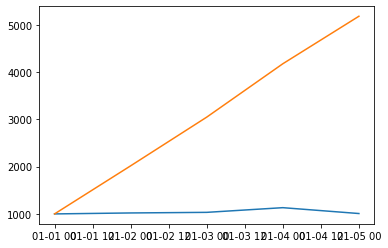

In [81]:
plt.plot(df[:5])
plt.plot(df[:5].cumsum())

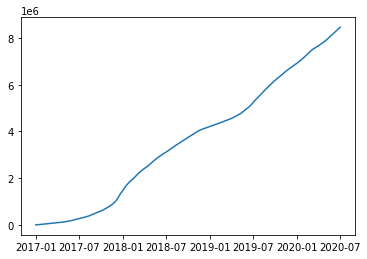

In [84]:
plt.plot(df.cumsum())

## Percentage change

In [82]:
df[:5]

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150


In [83]:
df[:5].pct_change()

,bpi
date,
2017-01-01,NaN
2017-01-02,0.020408
2017-01-03,0.012541
2017-01-04,0.096091
2017-01-05,-0.109796
